In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
import openpyxl as opx

In [2]:
erp = pd.read_excel("erp.xlsx")
liaison = pd.read_excel("liaison.xlsx")
web = pd.read_excel("web.xlsx")
web.rename(columns={'sku':'id_web'}, inplace=True)
web = web.loc[web["post_type"] == 'product']
web = web[web["id_web"].notnull()]

/Users/lucasleclercq/opt/miniconda3/envs/p4/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/Users/lucasleclercq/opt/miniconda3/envs/p4/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [3]:
#display(erp)
#display(liaison)
#display(web)

In [4]:
df = pd.merge(erp,liaison,on='product_id',how='outer',indicator=True)
df.loc[df["_merge"] != "both"]

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,_merge


Chaque ligne de ERP à une réference dans liaison

In [5]:
del df["_merge"]

In [6]:
data = pd.merge(df, web, on='id_web', how='outer', indicator=True)
data_final = data.loc[data["_merge"] == "both", ['post_name','price','total_sales']]
data_final["Total"] = data_final["price"] * data_final["total_sales"]
data_final.isnull().sum()

post_name      0
price          0
total_sales    0
Total          0
dtype: int64

In [7]:
display(data_final)
print("Le Chiffre d'affaires total est de",data_final["Total"].sum(),"Euros")

,post_name,price,total_sales,Total
0,pierre-jean-villa-saint-joseph-preface-2018,24.2,6.0,145.2
1,pierre-jean-villa-saint-joseph-tilde-2017,34.3,0.0,0.0
2,pierre-jean-villa-croze-hermitage-accroche-coe...,20.8,0.0,0.0
3,pierre-jean-villa-igp-gamine-2018,14.1,3.0,42.3
4,pierre-jean-villa-cote-rotie-carmina-2017,46.0,0.0,0.0
...,...,...,...,...
819,mouthes-le-bihan-aime-chai-2015,8.4,5.0,42.0
820,camin-larredya-jurancon-sec-la-virada-2018,27.5,0.0,0.0
821,jamet-cote-rotie-fructus-voluptas-2018,69.0,0.0,0.0
822,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,54.8,0.0,0.0


Le Chiffre d'affaires total est de 70568.6 Euros


## Outlier

In [8]:
data_final.describe()

,price,total_sales,Total
count,714.000000,714.000000,714.000000
mean,32.493137,4.012605,98.835574
std,27.810525,8.518183,307.685071
min,5.200000,0.000000,0.000000
25%,14.100000,0.000000,0.000000
50%,23.550000,1.000000,15.250000
75%,42.175000,4.000000,91.150000
max,225.000000,96.000000,4704.000000


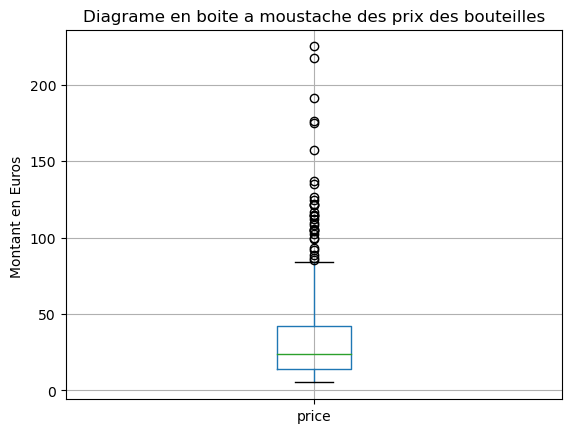

In [9]:
data_final.boxplot(column="price")
plt.ylabel('Montant en Euros ')
plt.title('Diagrame en boite a moustache des prix des bouteilles')
plt.show()

In [10]:
data_final.loc[data_final["price"] > 42].count()

post_name      180
price          180
total_sales    180
Total          180
dtype: int64

In [11]:
data_final.loc[data_final["price"] > 42].head(20).sort_values('price',ascending=False)

,post_name,price,total_sales,Total
154,zind-humbrecht-riesling-gc-rangen-thann-clos-s...,100.0,0.0,0.0
156,zind-humbrecht-pinot-gris-grand-cru-rangen-de-...,88.4,0.0,0.0
10,pierre-gaillard-cote-rotie-rose-pourpre-2017,80.0,6.0,480.0
218,lucien-boillot-nuits-saint-georges-1ercru-prul...,79.8,0.0,0.0
126,chateau-de-vaudieu-chateauneuf-du-pape-lavenue...,77.8,0.0,0.0
159,zind-humbrecht-gewurzt-grand-cru-rangen-de-tha...,77.4,0.0,0.0
18,clos-du-mont-olivet-chateauneuf-du-pape-papet-...,71.6,10.0,716.0
166,champagne-mailly-grand-cru-intemporelle-rose-2009,69.0,0.0,0.0
8,pierre-gaillard-cote-rotie-esprit-blond-2017,60.0,3.0,180.0
122,gilles-robin-hermitage-2012,60.0,0.0,0.0
